In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fuentes:

https://www.geeksforgeeks.org/gaussian-mixture-model/

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

In [2]:
path = r"C:\Users\OMEN CI7\Documents\repository\Neurociencias-2025-2\S03_datasets\iris\iris.csv"

df = pd.read_csv(path)
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


<AxesSubplot:xlabel='Petal.Length', ylabel='Sepal.Length'>

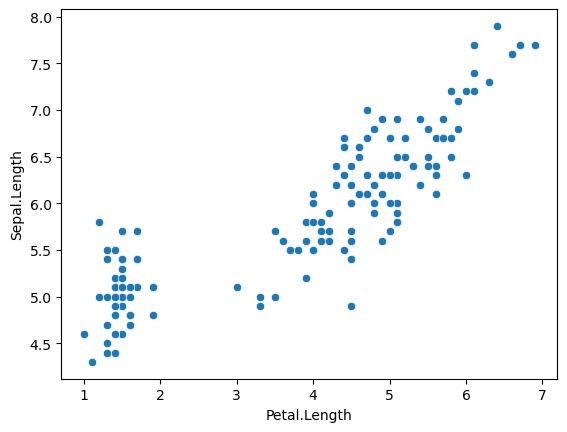

In [3]:
sns.scatterplot(data=df, x='Petal.Length', y='Sepal.Length')

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [5]:
X_std = StandardScaler().fit_transform(df.iloc[:, :-1])

df_std = pd.DataFrame(data=X_std, columns=df.columns[:-1])
df_std['Species'] = df['Species']

# K means

In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_std)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<AxesSubplot:title={'center':'kmeans classification'}, xlabel='Petal.Length', ylabel='Sepal.Length'>

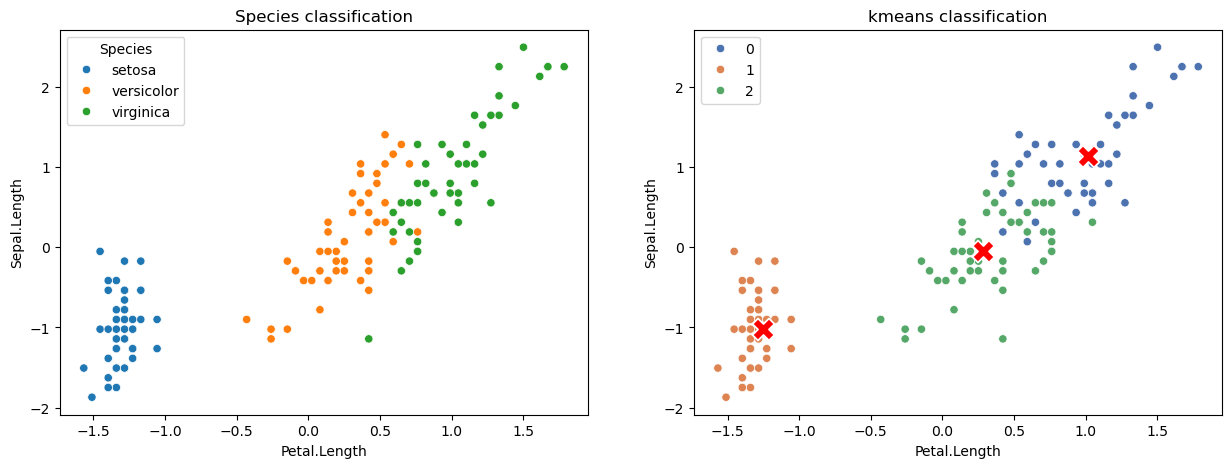

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(data=df_std, x='Petal.Length', y='Sepal.Length', 
                hue='Species', ax=axes[0]).set_title("Species classification")

sns.scatterplot(data=df_std, x='Petal.Length', y='Sepal.Length', 
                hue=labels, ax=axes[1], palette='deep').set_title("kmeans classification")
sns.scatterplot(x=cluster_centers[:, 3], y=cluster_centers[:, 0], marker="X", s=250, color='r', ax=axes[1])

# Gaussian mixture

In [8]:
gm = GaussianMixture(n_components=3, random_state=0).fit(X_std)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'kmeans classification')

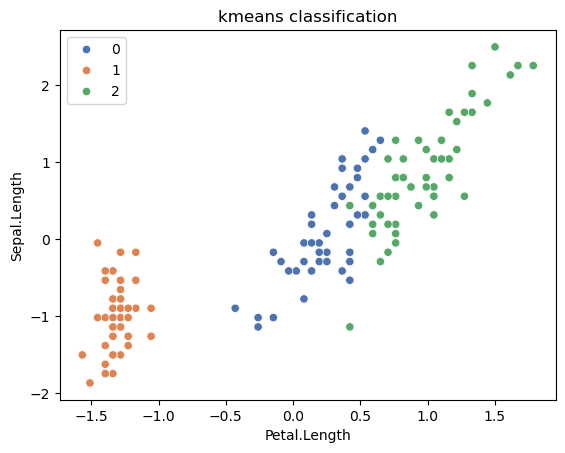

In [9]:
sns.scatterplot(data=df_std, x='Petal.Length', y='Sepal.Length', 
                hue=gm.predict(X_std), palette='deep').set_title("kmeans classification")


In [10]:
gm.means_

array([[ 0.08890219, -0.64297712,  0.25393414,  0.13018296],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 0.85158495, -0.24859804,  0.98047264,  1.03665053]])

In [11]:
gm.n_iter_

19

In [12]:
gm.score(X_std)

-1.9369263973830528

In [13]:
gm.fit_predict(X_std)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [14]:
gm.precisions_

array([[[  6.90883379,  -1.60558041, -13.40275853,   4.00162137],
        [ -1.60558041,   5.87062506,   0.74117892, -11.78115794],
        [-13.40275853,   0.74117892,  63.63317046, -33.2354861 ],
        [  4.00162137, -11.78115794, -33.2354861 ,  66.45983611]],

       [[ 13.16587178,  -4.53806328,  -6.66699595,  -3.05556167],
        [ -4.53806328,   2.99829734,   0.86637706,  -0.70850942],
        [ -6.66699595,   0.86637706, 122.46582949, -24.45680401],
        [ -3.05556167,  -0.70850942, -24.45680401,  62.44710441]],

       [[  6.71298662,  -0.92565972, -13.07412214,   1.47951397],
        [ -0.92565972,   2.86802996,   0.28654579,  -2.78738804],
        [-13.07412214,   0.28654579,  38.05363336,  -5.81193439],
        [  1.47951397,  -2.78738804,  -5.81193439,  11.17046223]]])

In [15]:
kmeans.cluster_centers_

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

In [16]:
kmeans.n_iter_

5

<AxesSubplot:title={'center':'Gaussian mixture'}, xlabel='Petal.Length', ylabel='Sepal.Length'>

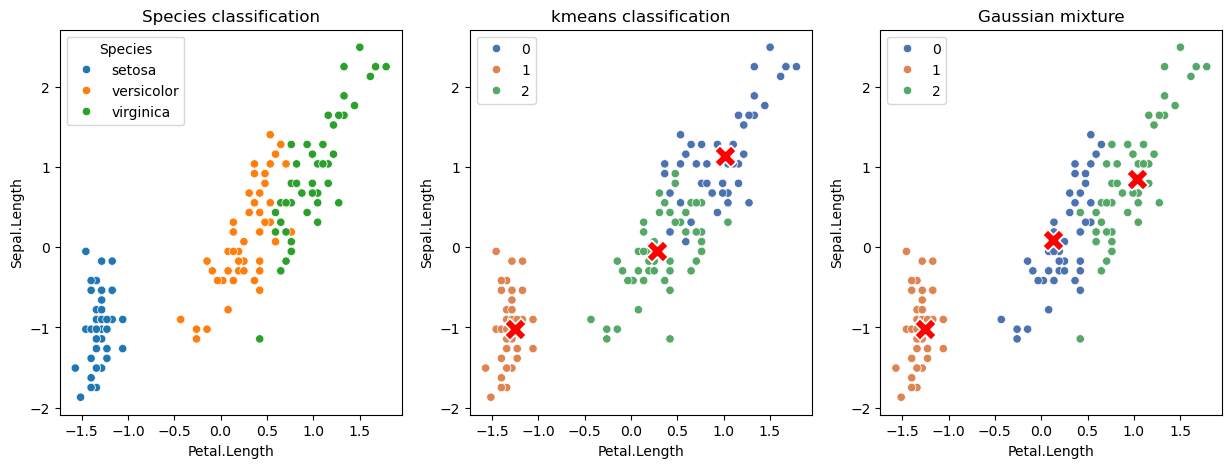

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(data=df_std, x='Petal.Length', y='Sepal.Length', 
                hue='Species', ax=axes[0]).set_title("Species classification")

sns.scatterplot(data=df_std, x='Petal.Length', y='Sepal.Length', 
                hue=labels, ax=axes[1], palette='deep').set_title("kmeans classification")
sns.scatterplot(x=cluster_centers[:, 3], y=cluster_centers[:, 0], marker="X", s=250, color='r', ax=axes[1])

sns.scatterplot(data=df_std, x='Petal.Length', y='Sepal.Length', 
                hue=gm.predict(X_std), ax=axes[2], palette='deep').set_title("Gaussian mixture")
sns.scatterplot(x=gm.means_[:, 3], y=gm.means_[:, 0], marker="X", s=250, color='r', ax=axes[2])

In [18]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [51]:
mapeo = {1: 'setosa', 2: 'versicolor', 0: 'virginica'}
df_std['kmeans'] = labels
df_std['kmeans'] = df_std['kmeans'].map(mapeo)

mapeo = {1: 'setosa', 0: 'versicolor', 2: 'virginica'}
df_std['gaussian_mix'] = gm.predict(X_std)
df_std['gaussian_mix'] = df_std['gaussian_mix'].map(mapeo)

In [52]:
df_std

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,kmeans,gaussian_mix
0,-0.900681,1.019004,-1.340227,-1.315444,setosa,setosa,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa,setosa,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa,setosa,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa,setosa,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa,setosa,setosa
...,...,...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,virginica,virginica,virginica
146,0.553333,-1.282963,0.705921,0.922303,virginica,versicolor,virginica
147,0.795669,-0.131979,0.819596,1.053935,virginica,virginica,virginica
148,0.432165,0.788808,0.933271,1.448832,virginica,virginica,virginica


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score

Text(792.3131313131312, 0.5, 'Real')

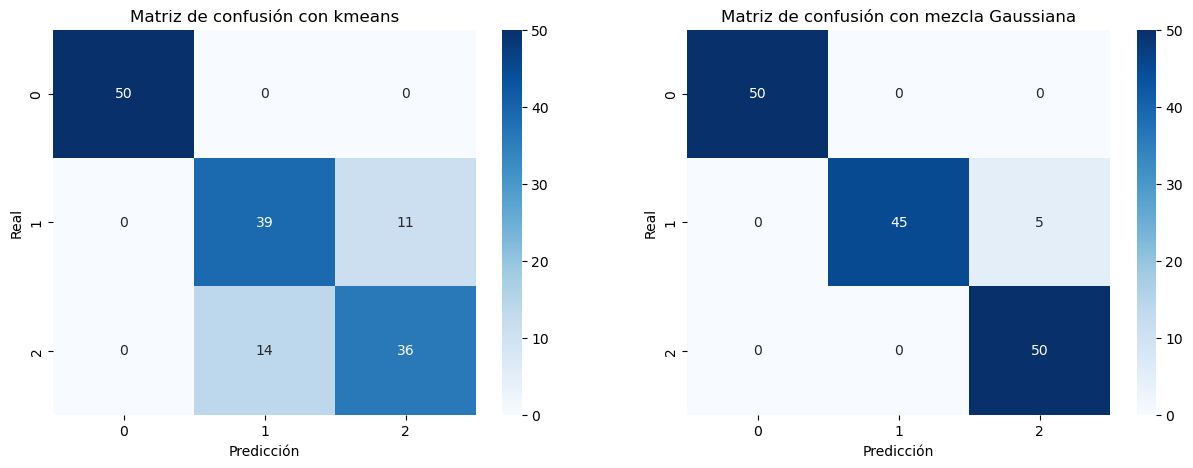

In [58]:
cm_kmeans = confusion_matrix(df_std.Species, df_std.kmeans, labels=df_std.Species.unique())
cm_gauss = confusion_matrix(df_std.Species, df_std.gaussian_mix, labels=df_std.Species.unique())

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(cm_kmeans, annot=True, fmt="d", cmap="Blues", ax=axes[0]).set_title('Matriz de confusión con kmeans')

# Etiquetas de los ejes
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

sns.heatmap(cm_gauss, annot=True, fmt="d", cmap="Blues", ax=axes[1]).set_title('Matriz de confusión con mezcla Gaussiana')

# Etiquetas de los ejes
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")


In [43]:
# df_std.Species, df_std.gaussian_mix
df_std.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,kmeans,gaussian_mix
0,-0.900681,1.019004,-1.340227,-1.315444,setosa,setosa,versicolor
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa,setosa,versicolor
2,-1.385353,0.328414,-1.397064,-1.315444,setosa,setosa,versicolor


In [44]:
categories = df_std.Species.unique()
categories

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [57]:
matrix_conf = {}
for category_real in categories:
    real = []
    for category_model in categories:
        total = len(df_std[(df_std['Species']==category_real) & (df_std['gaussian_mix']==category_model)])
        real.append(total)
    matrix_conf[category_real] = real
    
matrix_conf

{'setosa': [50, 0, 0], 'versicolor': [0, 45, 5], 'virginica': [0, 0, 50]}

In [59]:
matrix_conf = {}
for category_real in categories:
    real = []
    for category_model in categories:
        total = len(df_std[(df_std['Species']==category_real) & (df_std['kmeans']==category_model)])
        real.append(total)
    matrix_conf[category_real] = real
    
matrix_conf

{'setosa': [50, 0, 0], 'versicolor': [0, 39, 11], 'virginica': [0, 14, 36]}

In [26]:
# accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy_score(df_std.Species, df_std.kmeans), accuracy_score(df_std.Species, df_std.gaussian_mix)

(0.8333333333333334, 0.3333333333333333)

In [27]:
# precision = TP / (TP + FP)
print(precision_score(df_std.Species, df_std.kmeans, labels=df_std.Species.unique(), average='macro'), 
precision_score(df_std.Species, df_std.gaussian_mix, labels=df_std.Species.unique(), average='macro'))

0.8339355011374282 0.30303030303030304


In [28]:
# precision = TP / (TP + FP). The ratio of true positives to all predicted positives. It measures the quality of positive predictions. 
# Recall: TP / (TP + FN). The ratio of true positives to all actual positives. It measures the model's ability to identify all positive instances. 
# F1: 2 * Precision * Recall / (Precision + Recall)
print(classification_report(df_std.Species, df_std.kmeans, labels=df_std.Species.unique()))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.74      0.78      0.76        50
   virginica       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



In [29]:
# precision = TP / (TP + FP). The ratio of true positives to all predicted positives. It measures the quality of positive predictions. 
# Recall: TP / (TP + FN). The ratio of true positives to all actual positives. It measures the model's ability to identify all positive instances. 
# F1: 2 * Precision * Recall / (Precision + Recall)
print(classification_report(df_std.Species, df_std.gaussian_mix, labels=df_std.Species.unique()))

              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        50
  versicolor       0.00      0.00      0.00        50
   virginica       0.91      1.00      0.95        50

    accuracy                           0.33       150
   macro avg       0.30      0.33      0.32       150
weighted avg       0.30      0.33      0.32       150



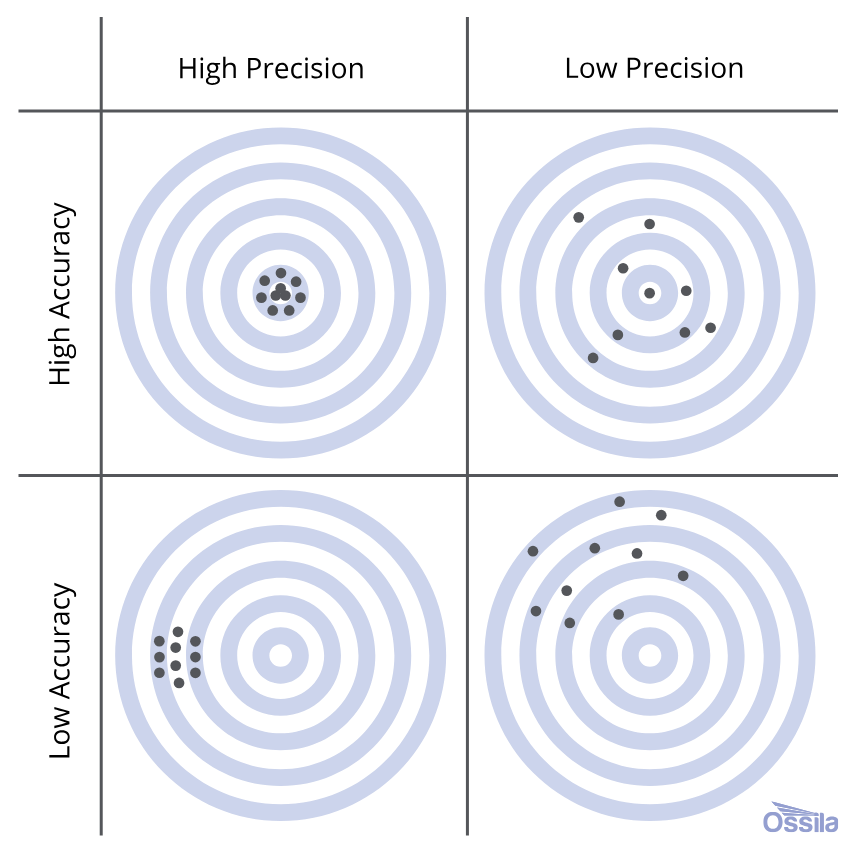


In [30]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(df_std.Species, df_std.kmeans)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [1.         0.73584906 0.76595745]
recall: [1.   0.78 0.72]
fscore: [1.         0.75728155 0.74226804]
support: [50 50 50]


In [31]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [32]:
df.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [33]:
df_std.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,kmeans,gaussian_mix
0,-0.900681,1.019004,-1.340227,-1.315444,setosa,setosa,versicolor
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa,setosa,versicolor


In [34]:
X = df_std.iloc[:, :4]

Z = linkage(X, "ward")

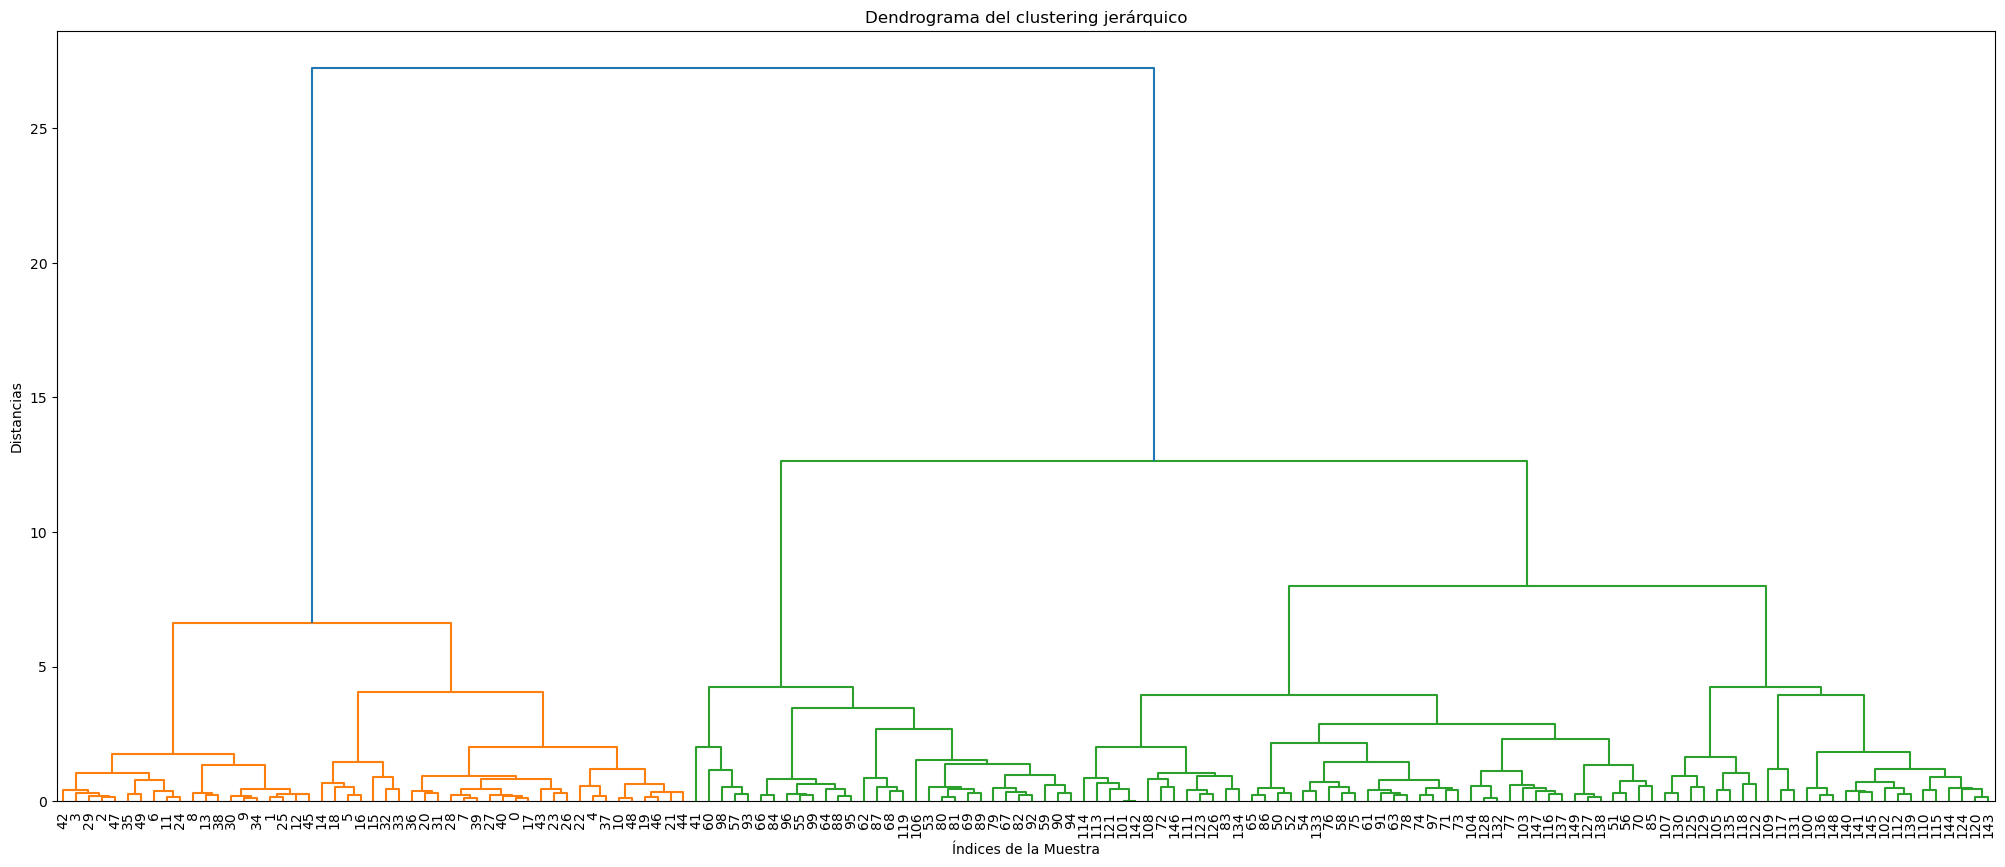

In [35]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=10.0, color_threshold=20)
plt.show()

In [36]:
import numpy as np

[27.24991146 12.63684352  8.00474726  6.60781224  4.24348495  4.22703313
  4.06134011  3.95076988  3.93266869  3.44191215]


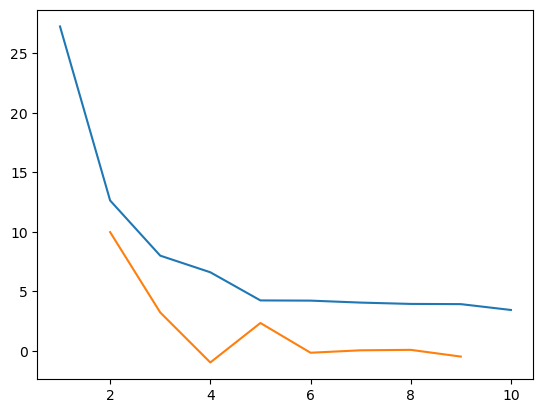

El número óptimo de cluster es 2


In [37]:
last = Z[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() +2
print("El número óptimo de cluster es %s"%str(k))

In [38]:
Z[-10:, :]

array([[255.        , 287.        ,   3.44191215,  25.        ],
       [284.        , 288.        ,   3.93266869,  45.        ],
       [272.        , 281.        ,   3.95076988,  18.        ],
       [277.        , 282.        ,   4.06134011,  29.        ],
       [279.        , 291.        ,   4.22703313,  26.        ],
       [283.        , 289.        ,   4.24348495,  30.        ],
       [280.        , 292.        ,   6.60781224,  49.        ],
       [290.        , 293.        ,   8.00474726,  71.        ],
       [294.        , 296.        ,  12.63684352, 101.        ],
       [295.        , 297.        ,  27.24991146, 150.        ]])

In [39]:
from scipy.cluster.hierarchy import fcluster

Text(0.5, 1.0, 'Dendrograma')

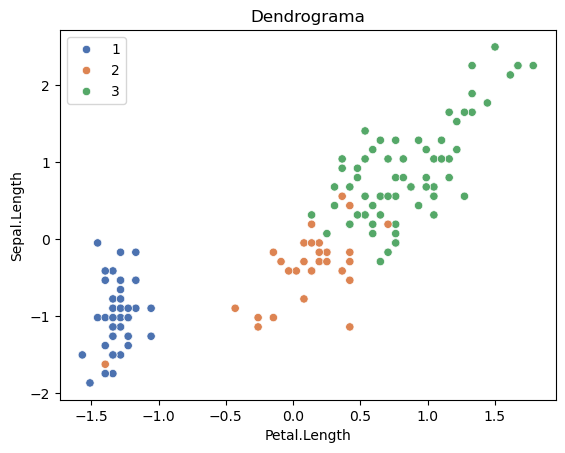

In [40]:
k=6
clusters = fcluster(Z, 8.1, criterion="distance")

sns.scatterplot(data=df_std, x='Petal.Length', y='Sepal.Length', 
                hue=clusters, palette='deep').set_title("Dendrograma")


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5]],
 'dcoord': [[0.0, 2.8284271247461903, 2.8284271247461903, 0.0],
  [0.0, 2.8284271247461903, 2.8284271247461903, 0.0],
  [0.0, 4.898979485566357, 4.898979485566357, 2.8284271247461903],
  [2.8284271247461903,
   12.09958676980334,
   12.09958676980334,
   4.898979485566357]],
 'ivl': ['3', '4', '2', '0', '1'],
 'leaves': [3, 4, 2, 0, 1],
 'color_list': ['C1', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C2', 'C2', 'C2']}

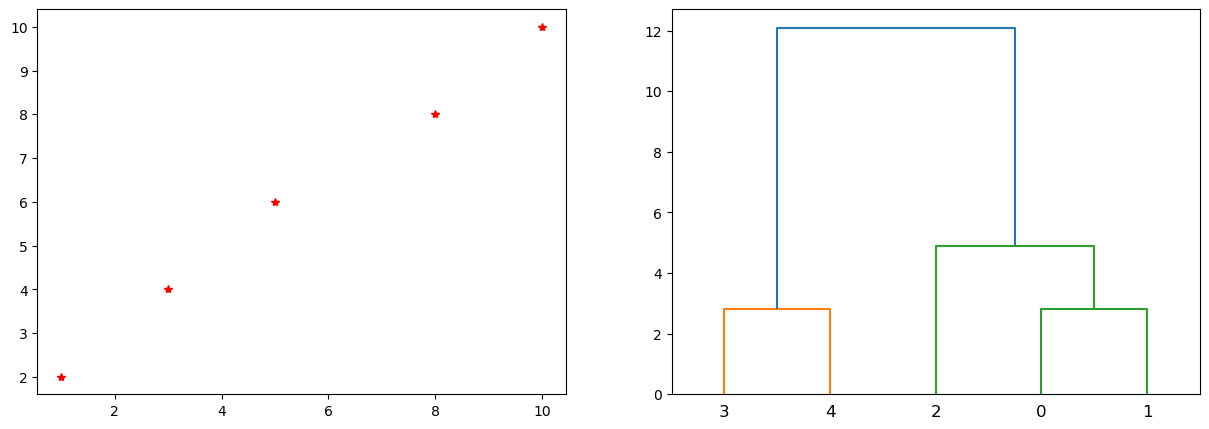

In [41]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Datos de ejemplo (5 puntos en 2D)
X = np.array([[1, 2], [3, 4], [5, 6], [8, 8], [10, 10]])

# Aplicar linkage con método Ward
Z = linkage(X, method='ward')

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# sns.heatmap(cm_kmeans, annot=True, fmt="d", cmap="Blues", ax=axes[0]).set_title('Matriz de confusión con kmeans')
axes[0].plot(X[:, 0], X[:, 1], 'r*')

dendrogram(Z)
